# SPOT THE MASK
_KTM, 19 Aug 2020_

In [8]:
# fastai imports
from fastai.vision import *

# custom imports
import os

In [23]:
pd.read_csv('./data/train_labels.csv')

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1
...,...,...
1303,hxjwafskxmlfaotwaklzuwuccsbxfu.jpg,0
1304,oyodauphffgmzmvqlykcfvmyxartok.jpg,1
1305,uppvtemhkneqggtbfubeccqjvyefiw.png,1
1306,mzjjvzkzvqmyukzsegtoktaslejcdz.jpg,0


In [25]:
fnames = os.listdir('./data/images')

In [27]:
len(fnames)

1817

## 0. GPU?

In [9]:
torch.cuda.is_available()

True

## 1. Data

In [11]:
path = Path('./data')

In [12]:
tfms = get_transforms(max_rotate=25)

In [13]:
data = ImageDataBunch.from_csv(path,
    folder='images',
    csv_labels='train_labels.csv',
    valid_pct=0.2,
    fn_col='image',
    label_col='target',
    header='infer',
    no_check=False,
    ds_tfms=tfms,
    size=128)

In [14]:
ds = data.train_ds

## 2. Explore Images and Labels

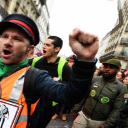

In [15]:
img, label = ds[34]
img

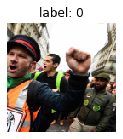

In [16]:
img.show(figsize=(2,2), title='label: ' + str(label))

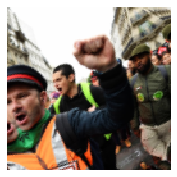

In [17]:
img.rotate(35).show()

## Load the Learner

In [18]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

## Learning Finder: `lr_find`

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


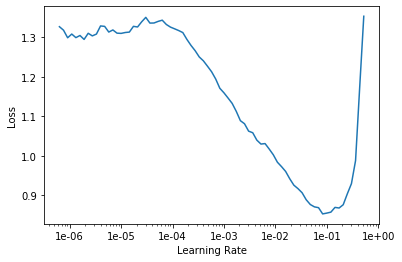

In [20]:
learn.recorder.plot()

## Train

In [22]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.237337,0.219210,0.900383,00:50
1,0.209854,0.203822,0.919540,00:57
2,0.199157,0.245773,0.919540,00:54
3,0.208692,0.300167,0.911877,00:54
4,0.206396,0.244675,0.938697,00:55
